/Users/sankalpsaoji98/.pyenv/versions/3.11.8/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sankalpsaoji98/.pyenv/versions/3.11.8/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sankalpsaoji98/.pyenv/versions/3.11.8/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

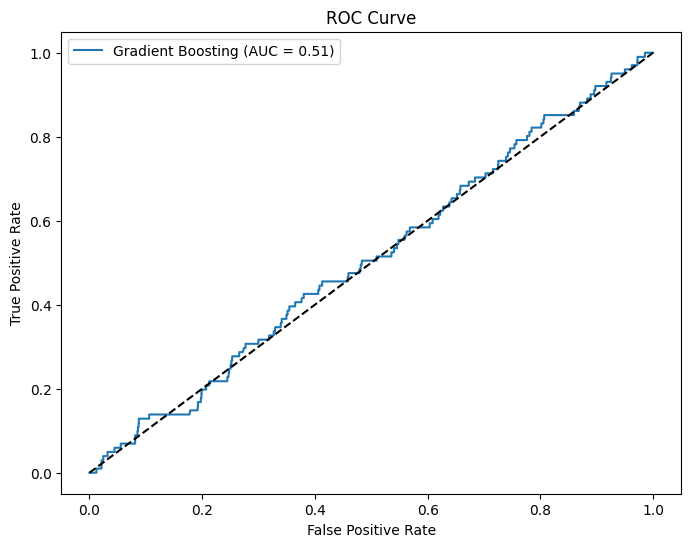

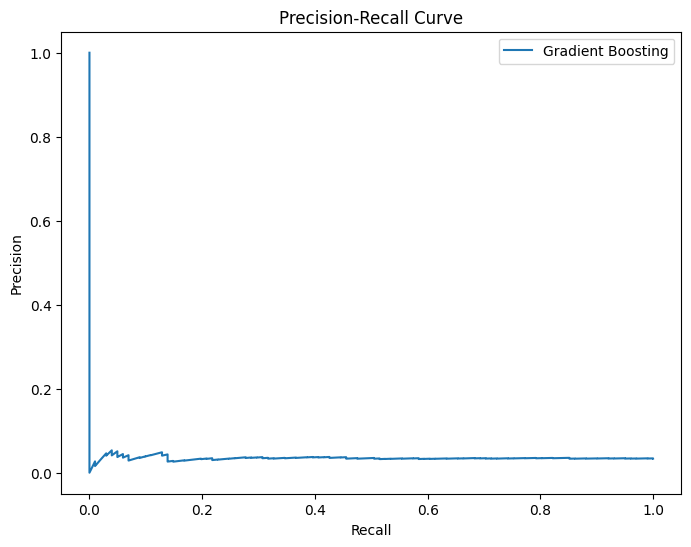

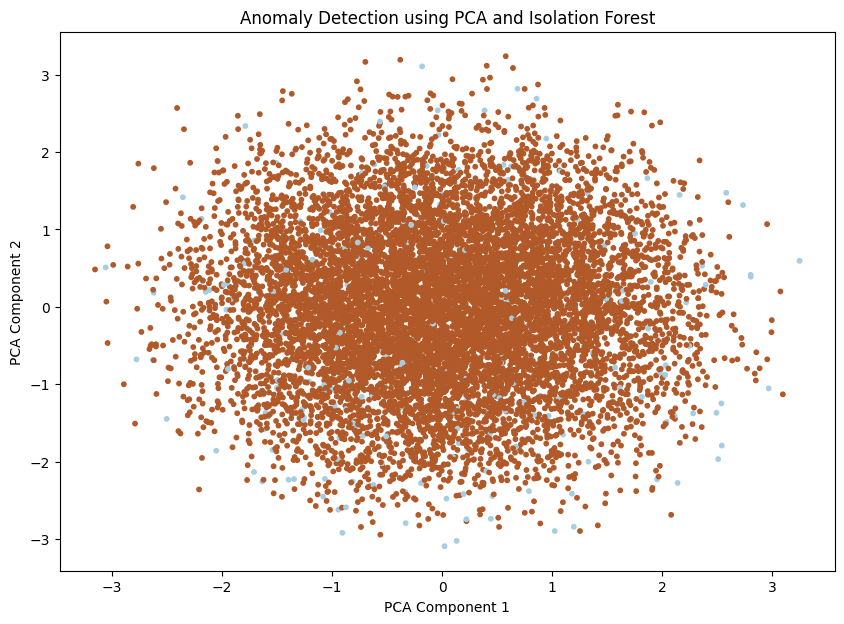

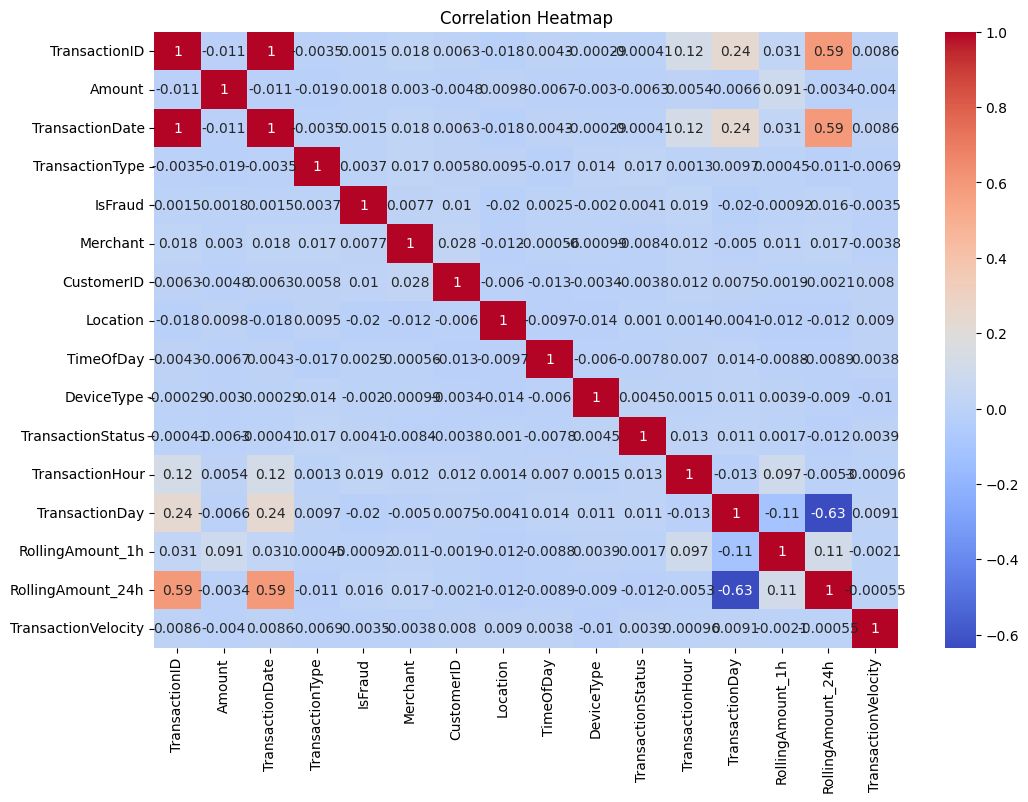

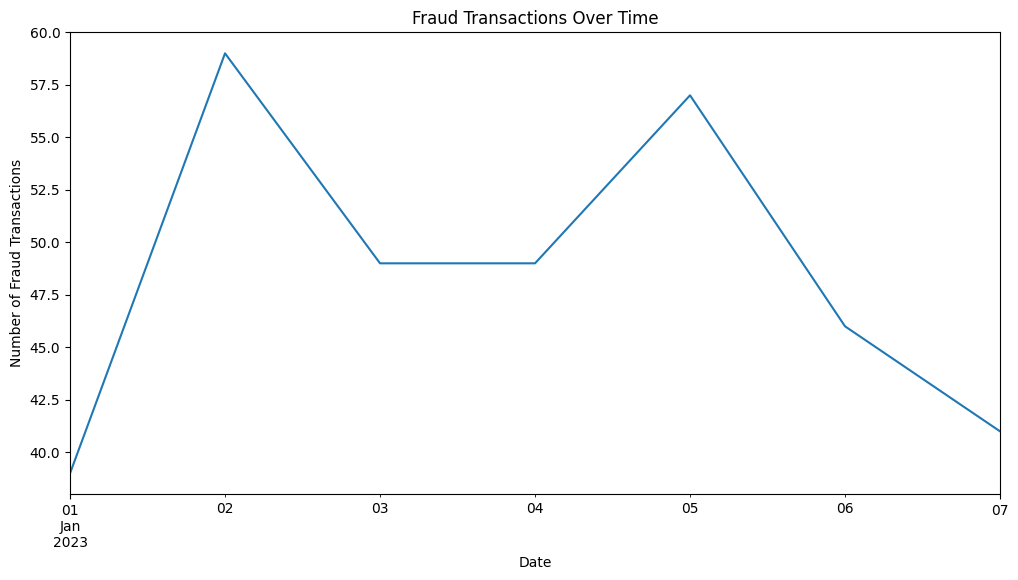

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2899
           1       0.00      0.00      0.00       101

    accuracy                           0.97      3000
   macro avg       0.48      0.50      0.49      3000
weighted avg       0.93      0.97      0.95      3000

Gradient Boosting Confusion Matrix:
 [[2899    0]
 [ 101    0]]
Gradient Boosting ROC AUC Score:
 0.5086458628615536


'complex_fraud_detection_data.xlsx'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Generating complex synthetic data
np.random.seed(42)

n_transactions = 10000
data = {
    'TransactionID': np.arange(1, n_transactions + 1),
    'Amount': np.random.uniform(10, 1000, n_transactions),
    'TransactionDate': pd.date_range(start='2023-01-01', periods=n_transactions, freq='T'),
    'TransactionType': np.random.choice(['Purchase', 'Withdrawal', 'Transfer'], n_transactions),
    'IsFraud': np.random.choice([0, 1], n_transactions, p=[0.97, 0.03]),
    'Merchant': np.random.choice(['Merchant_A', 'Merchant_B', 'Merchant_C', 'Merchant_D'], n_transactions),
    'CustomerID': np.random.randint(1000, 2000, n_transactions),
    'Location': np.random.choice(['Location_A', 'Location_B', 'Location_C', 'Location_D'], n_transactions),
    'TimeOfDay': np.random.choice(['Morning', 'Afternoon', 'Evening', 'Night'], n_transactions),
    'DeviceType': np.random.choice(['Mobile', 'Desktop', 'Tablet'], n_transactions),
    'TransactionStatus': np.random.choice(['Completed', 'Pending', 'Failed'], n_transactions)
}

df = pd.DataFrame(data)

# Advanced Feature Engineering
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDay'] = df['TransactionDate'].dt.dayofweek
df['RollingAmount_1h'] = df['Amount'].rolling(window=60).mean()
df['RollingAmount_24h'] = df['Amount'].rolling(window=1440).mean()
df['TransactionVelocity'] = df['CustomerID'].map(df['CustomerID'].value_counts())

# Encode categorical features
label_encoders = {}
categorical_features = ['TransactionType', 'Merchant', 'Location', 'TimeOfDay', 'DeviceType', 'TransactionStatus']

for feature in categorical_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

# Fill NaNs in rolling features
df.fillna(0, inplace=True)

# Correlation Analysis
correlation_matrix = df.corr()

# Machine Learning Model for Fraud Detection
features = ['Amount', 'TransactionHour', 'TransactionDay', 'RollingAmount_1h', 'RollingAmount_24h', 'TransactionVelocity'] + categorical_features
X = df[features]
y = df['IsFraud']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)

# Best model from grid search
best_gb_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_gb_model.predict(X_test_scaled)
classification_report_gb = classification_report(y_test, y_pred)
confusion_matrix_gb = confusion_matrix(y_test, y_pred)
roc_auc_gb = roc_auc_score(y_test, best_gb_model.predict_proba(X_test_scaled)[:, 1])

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_gb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, best_gb_model.predict_proba(X_test_scaled)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Gradient Boosting')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Anomaly Detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.03, random_state=42)
anomaly_labels = iso_forest.fit_predict(X_scaled)

# PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=anomaly_labels, cmap='Paired', s=10)
plt.title('Anomaly Detection using PCA and Isolation Forest')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Time Series Analysis
fraud_over_time = df.set_index('TransactionDate').resample('D')['IsFraud'].sum()

# Save data to Excel
file_path = "complex_fraud_detection_data.xlsx"
df.to_excel(file_path, index=False)

# Visualizations
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Fraud Transactions Over Time
plt.figure(figsize=(12, 6))
fraud_over_time.plot()
plt.title('Fraud Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Fraud Transactions')
plt.show()

# Print classification report and confusion matrix
print("Gradient Boosting Classification Report:\n", classification_report_gb)
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix_gb)
print("Gradient Boosting ROC AUC Score:\n", roc_auc_gb)

file_path